# Clustering

Rionaldi Chandraseta - 13515077

In [1]:
import matplotlib.pyplot as plt
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def visualize_iris_3d(df_X, labels):
    coms = combinations([0,1,2,3], 3)
    elevation = [10, 10, 10, 10]
    azimuth = [45, 45, 45, 45]
    for idx, com in enumerate(coms):
        ax = plt.axes(projection='3d')
        ax.scatter3D(df_X.values[:, com[0]], df_X.values[:, com[1]], df_X.values[:, com[2]], c=labels, cmap='copper')
        ax.set_xlabel(df_X.columns[com[0]])
        ax.set_ylabel(df_X.columns[com[1]])
        ax.set_zlabel(df_X.columns[com[2]])
        ax.view_init(elevation[idx], azimuth[idx])
        plt.show()

## Read Dataset

### Iris

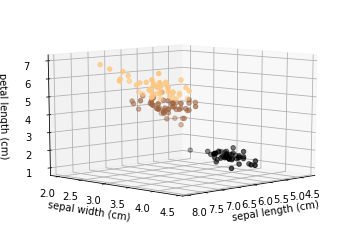

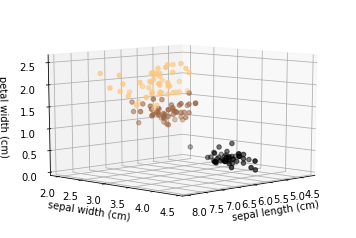

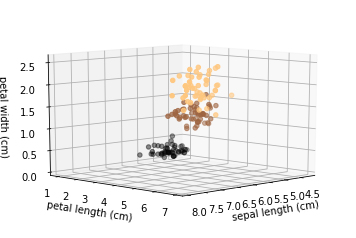

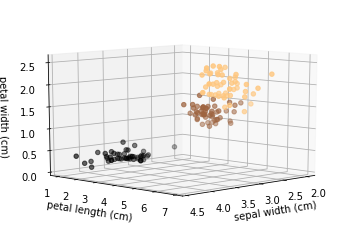

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets

iris_dataset = datasets.load_iris()
iris_dataframe = pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']],
                              columns=iris_dataset['feature_names'] + ['target'])

iris_X = iris_dataframe.iloc[:, 0:4]
iris_y = iris_dataframe.iloc[:, 4:]

visualize_iris_3d(iris_X, iris_dataframe.target)

### Play Tennis

In [3]:
play_tennis_dataframe = pd.read_csv('../data/play_tennis.csv', sep=',')

pt_X = play_tennis_dataframe.iloc[:, 0:4]
pt_y = play_tennis_dataframe.iloc[:, 4:]

play_tennis_dataframe

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,norml,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## K-Means

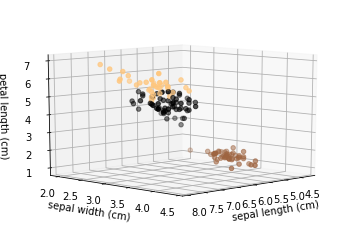

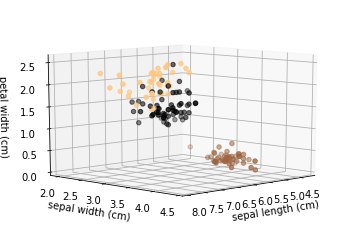

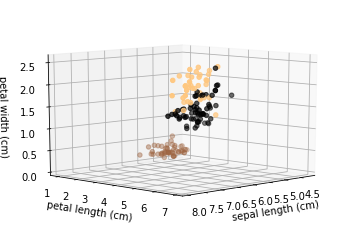

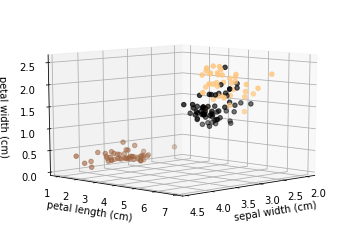

In [4]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(iris_X)

visualize_iris_3d(iris_X, k_means.labels_)

Parameter yang bisa digunakan oleh KMeans:
- **n_clusters**: menentukan jumlah _cluster_ dan centroid yang dihasilkan oleh model
- **init**: menentukan metode untuk inisialisasi
- **n_init**: menentukan jumlah berapa kali algoritma K-Means akan dijalankan dengan _seed_ centroid berbeda
- **max_iter**: menentukan jumlah iterasi maksimal setiap kali menjalankan algoritma K-Means
- **tol**: menentukan toleransi relatif terhadap inertia untuk menentukan apakah sudah konvergen
- **precompute_distances**: menentukan apakah dilakukan penghitungan jarak setiap sampel dengan setiap _cluster_ di awal
- **verbose**: menentukan seberapa banyak informasi log yang ditampilkan
- **random_state**: menentukan _seed_ bagi RNG
- **copy_x**: menentukan apakah data original dicopy terlebih dahulu sebelum diproses agar tidak berubah
- **n_jobs**: menentukan jumlah pekerjaan paralel yang dijalankan dalam perhitungan
- **algorithm**: menentukan algoritma K-Means yang digunakan, terdapat pilihan "full" atau "elkan"

## Agglomerative Clustering

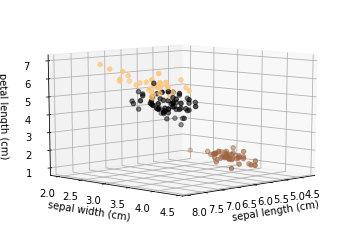

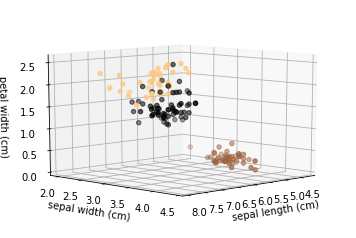

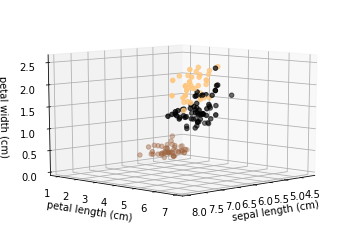

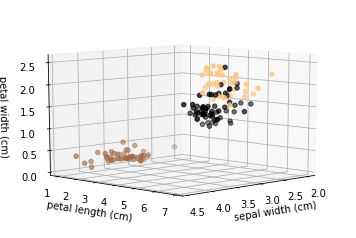

In [5]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(iris_X)

visualize_iris_3d(iris_X, agg_clustering.labels_)

Parameter yang bisa digunakan oleh Agglomerative Clustering:
- **n_clusters**: menentukan jumlah _cluster_ yang dihasilkan
- **affinity**: menentukan metrik yang digunakan untuk menghitung _linkage_ antar data
- **memory**: menentukan direktori yang digunakan untuk _caching_. Jika None, maka tidak akan dilakukan _caching_
- **connectivity**: menentukan matriks konektifitas dari data. Jika None, maka data dianggap tidak terstruktur
- **compute_full_tree**: hanya berguna jika matriks konektifitas ditentukan. Menentukan apakah pembangkitan pohon berhenti setelah n_clusters
- **linkage**: menentukan _linkage criterion_ yang digunakan, yaitu jarak dari data yang dilakukan _clustering_
- **pooling_func**: menentukan nilai dari fitur yang telah digabungkan pada satu _cluster_

## DBSCAN

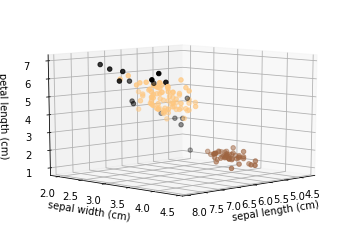

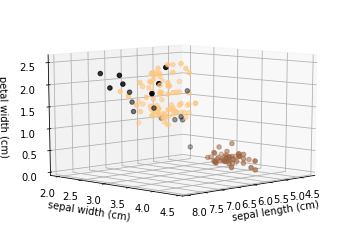

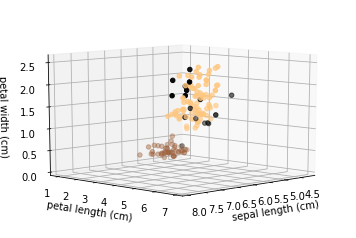

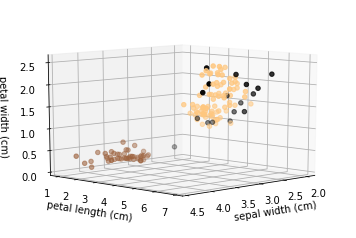

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(iris_X)

visualize_iris_3d(iris_X, dbscan.labels_)

Parameter yang bisa digunakan oleh DBSCAN:
- **eps**: menentukan jarak maksimum antara dua data agar dianggap sebagai tetangga
- **min_samples**: menentukan jumlah data bertetangga minimum agar sebuah data dianggap sebagai _core point_
- **metric**: menentukan metrik yang digunakan untuk menghitung jarak antar data
- **metric_params**: parameter tambahan untuk fungsi metrik
- **algorithm**: menentukan algoritma yang digunakan oleh modul NearestNeighbors untuk menentukan jarak dan mencari tetangga terdekat
- **leaf_size**: hanya digunakan jika algoritma='ball_tree' atau 'kd_tree'. Menentukan jumlah daun yang dibangkitkan
- **p**: menentukan _power_ dari metrik Minkowski yang digunakan untuk menghitung jarak antar titik
- **n_jobs**: menentukan jumlah pekerjaan paralel yang dijalankan dalam perhitungan

## Gaussian Mixtures

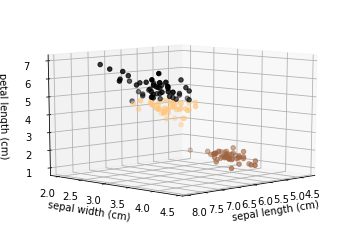

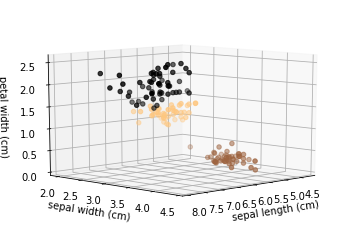

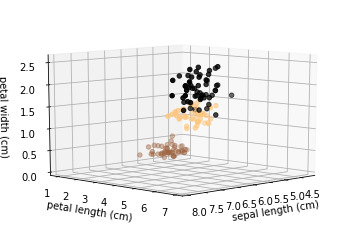

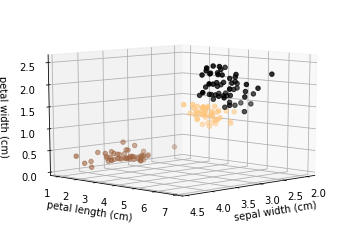

In [14]:
from sklearn.mixture import GaussianMixture

gauss_mix = GaussianMixture(n_components=3)
gauss_mix.fit(iris_X)

labels = gauss_mix.predict(iris_X)

visualize_iris_3d(iris_X, labels)

Parameter yang bisa digunakan oleh Gaussian Mixture:
- **n_components**:
- **covariance_type**:
- **tol**:
- **reg_covar**:
- **max_iter**:
- **n_init**:
- **init_params**:
- **weights_init**:
- **means_init**:
- **precisions_init**:
- **random_state**:
- **warm_start**:
- **verbose**:
- **verbose_interval**:

## K-Medoids 

Menggunakan library [pyclustering](https://pypi.org/project/pyclustering/)

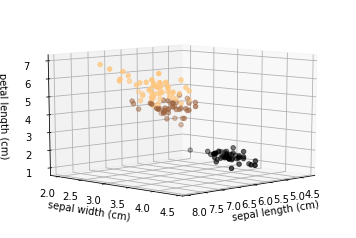

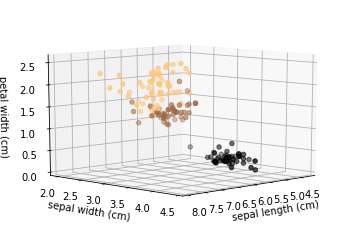

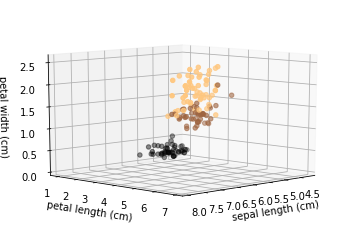

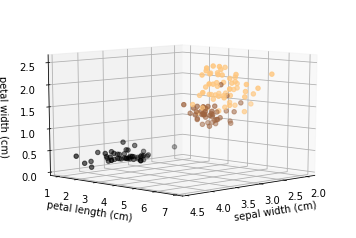

In [8]:
from pyclustering.cluster.kmedoids import kmedoids

initial_medoids = [0, 75, 149]
k_medoids = kmedoids(iris_X.values, initial_medoids)
k_medoids.process()

k_medoids_clusters = k_medoids.get_clusters()

k_medoids_labels = [0] * len(iris_y)

# Convert the result from .get_clusters() to labels for visualization
for label, cluster in enumerate(k_medoids_clusters):
    for index in cluster:
        k_medoids_labels[index] = label
        
visualize_iris_3d(iris_X, k_medoids_labels)

Parameter yang bisa digunakan oleh K-Medoids:
- **data**:
- **initial_index_medoids**:
- **tolerance**:
- **ccore**:

## Graph-Based Clustering

Menggunakan library [mst_clustering](https://pypi.org/project/mst_clustering/)

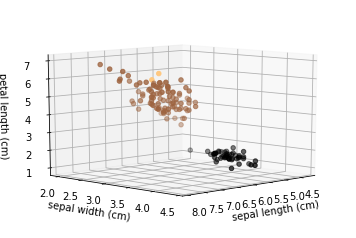

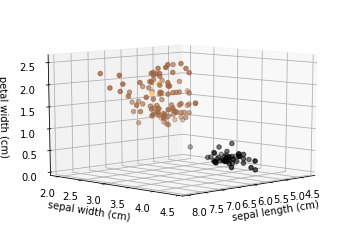

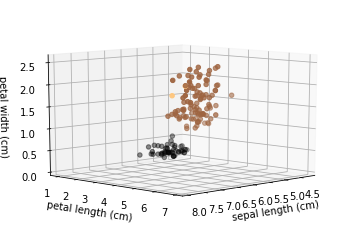

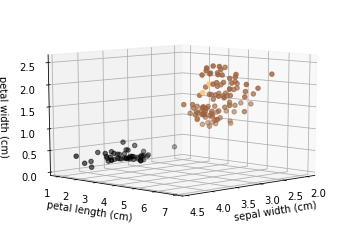

In [10]:
from mst_clustering import MSTClustering

graph_clustering = MSTClustering(cutoff=2)
graph_clustering_labels = graph_clustering.fit_predict(iris_X)

visualize_iris_3d(iris_X, graph_clustering_labels)

## Grid Clustering

## Save/Load Model

In [15]:
import dill

def save_model(model, filename):
    filepath = '../model/' + filename + '.mdl'
    dill.dump(model, open(filepath, 'wb'))

def load_model(filename):
    filepath = '../model/' + filename + '.mdl'
    return dill.load(open(filepath, 'rb'))

In [19]:
save_model(k_means, 'k_means')
save_model(agg_clustering, 'agglomerative_clustering')
save_model(dbscan, 'dbscan')
save_model(gauss_mix, 'gaussian_mixtures')
save_model(k_medoids, 'k_medoids')
save_model(graph_clustering, 'graph_based_clustering')

## Analyzing Data Distribution

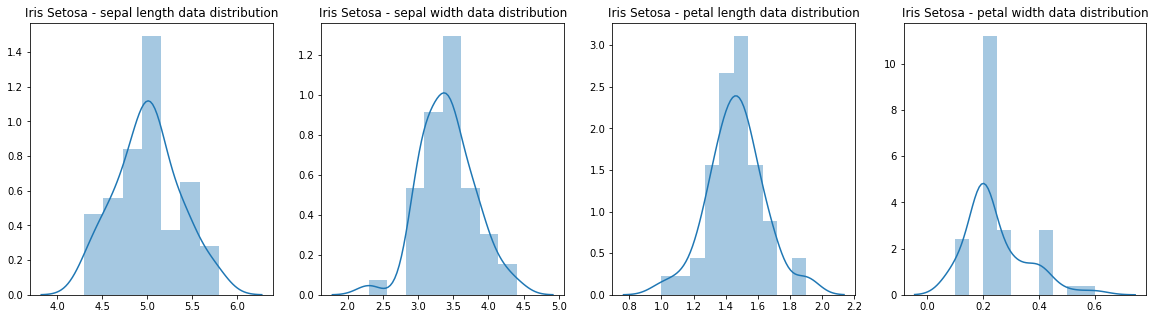

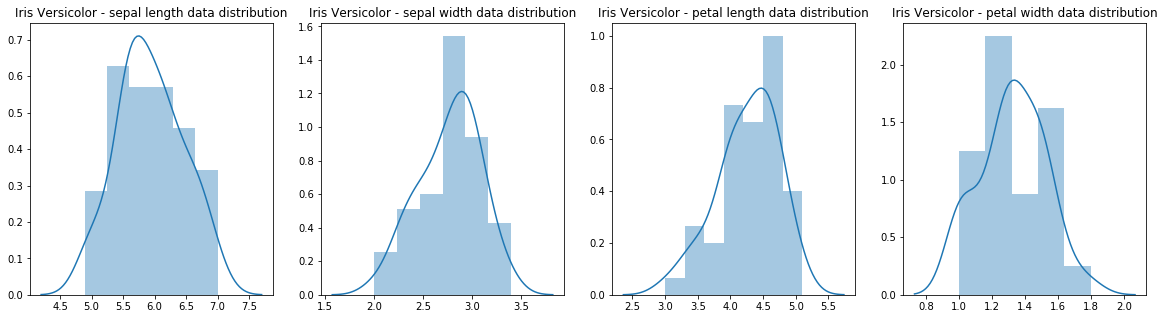

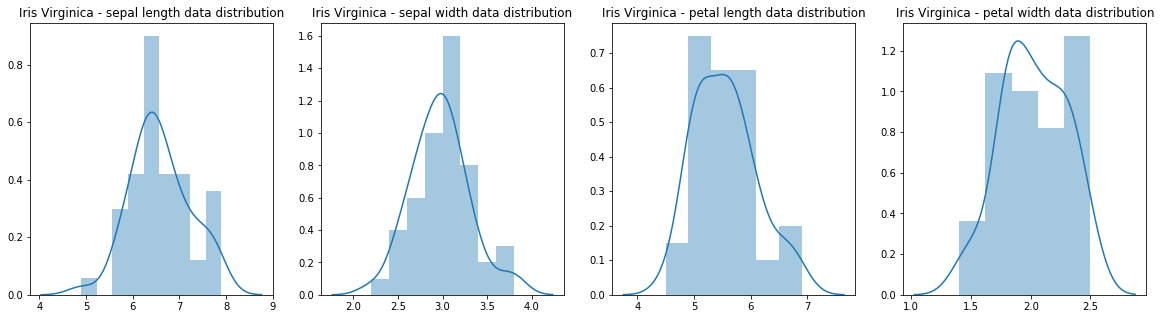

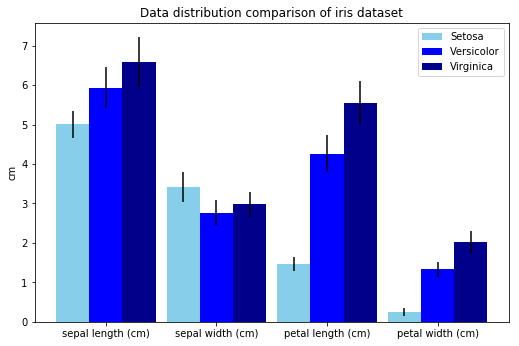

In [20]:
import seaborn as sns

iris_setosa = iris_dataframe[(iris_dataframe.target == 0)].iloc[:, 0:4]
iris_versicolor = iris_dataframe[(iris_dataframe.target == 1)].iloc[:, 0:4]
iris_virginica = iris_dataframe[(iris_dataframe.target == 2)].iloc[:, 0:4]

iris_setosa_means = [0, 0, 0, 0]
iris_setosa_stds = [0, 0, 0, 0]
for idx, column in enumerate(iris_setosa):
    iris_setosa_means[idx] = np.mean(iris_setosa[column].values)
    iris_setosa_stds[idx] = np.std(iris_setosa[column].values)

iris_versicolor_means = [0, 0, 0, 0]
iris_versicolor_stds = [0, 0, 0, 0]
for idx, column in enumerate(iris_versicolor):
    iris_versicolor_means[idx] = np.mean(iris_versicolor[column].values)
    iris_versicolor_stds[idx] = np.std(iris_versicolor[column].values)

iris_virginica_means = [0, 0, 0, 0]
iris_virginica_stds = [0, 0, 0, 0]
for idx, column in enumerate(iris_setosa):
    iris_virginica_means[idx] = np.mean(iris_virginica[column].values)
    iris_virginica_stds[idx] = np.std(iris_virginica[column].values)

# Display data distribution of Iris Setosa
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for idx, column in enumerate(iris_setosa):
    ax[idx].set_title('Iris Setosa - {} data distribution'.format(column[:-5]))
    sns.distplot(iris_setosa[column].values, ax=ax[idx])

# Display data distribution of Iris Versicolor
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for idx, column in enumerate(iris_versicolor):
    ax[idx].set_title('Iris Versicolor - {} data distribution'.format(column[:-5]))
    sns.distplot(iris_versicolor[column].values, ax=ax[idx])
    
# Display data distribution of Iris Virginica
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for idx, column in enumerate(iris_virginica):
    ax[idx].set_title('Iris Virginica - {} data distribution'.format(column[:-5]))
    sns.distplot(iris_virginica[column].values, ax=ax[idx])

    
# Display the means and stds difference
indices = np.arange(len(iris_setosa_means))
bar_width = 0.3

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 5.5)
bar1_setosa = ax.bar(indices - bar_width, iris_setosa_means, bar_width, yerr=iris_setosa_stds,
                     color='SkyBlue', label='Setosa')
bar2_versicolor = ax.bar(indices, iris_versicolor_means, bar_width, yerr=iris_versicolor_stds,
                     color='Blue', label='Versicolor')
bar3_virginica = ax.bar(indices + bar_width, iris_virginica_means, bar_width, yerr=iris_virginica_stds,
                     color='DarkBlue', label='Virginica')
ax.set_title('Data distribution comparison of iris dataset')
ax.set_ylabel('cm')
ax.set_xticks(indices)
ax.set_xticklabels(iris_setosa.columns.tolist())
ax.legend()

plt.show()

From the data distribution graphs above, we can conclude that the data distribution is nearing Normal distribution. Therefore, we could generate new data by drawing from normal distribution using the following means and standard deviations.

In [21]:
print("Setosa - means: {} - stds: {}".format(['%.4f' % x for x in iris_setosa_means],['%.4f' % x for x in iris_setosa_stds]))
print("Versicolor - means: {} - stds: {}".format(['%.4f' % x for x in iris_versicolor_means],['%.4f' % x for x in iris_versicolor_stds]))
print("Virginica - means: {} - stds: {}".format(['%.4f' % x for x in iris_virginica_means],['%.4f' % x for x in iris_virginica_stds]))

Setosa - means: ['5.0060', '3.4180', '1.4640', '0.2440'] - stds: ['0.3489', '0.3772', '0.1718', '0.1061']
Versicolor - means: ['5.9360', '2.7700', '4.2600', '1.3260'] - stds: ['0.5110', '0.3106', '0.4652', '0.1958']
Virginica - means: ['6.5880', '2.9740', '5.5520', '2.0260'] - stds: ['0.6295', '0.3193', '0.5463', '0.2719']


## TODO

- Generate new data by using the same data distribution + epsilon
- Classify new data, plot